In [1]:
import os
import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx
from pyproj import CRS

In [2]:
place_name = 'Kamppi, Helsinki, Finland'
graph = ox.graph_from_place(place_name, network_type='drive')

/Users/cristian/opt/anaconda3/envs/geo/lib/python3.6/site-packages/osmnx/utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/cristian/opt/anaconda3/envs/geo/lib/python3.6/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/Users/cristian/opt/anaconda3/envs/geo/lib/python3.6/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


/Users/cristian/opt/anaconda3/envs/geo/lib/python3.6/site-packages/osmnx/utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/cristian/opt/anaconda3/envs/geo/lib/python3.6/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/Users/cristian/opt/anaconda3/envs/geo/lib/python3.6/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


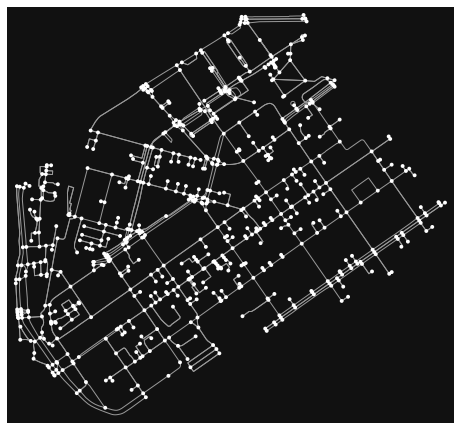

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [12]:
bike_graph = ox.graph_from_place(place_name, network_type='bike')
ox.plot_graph(bike_graph)

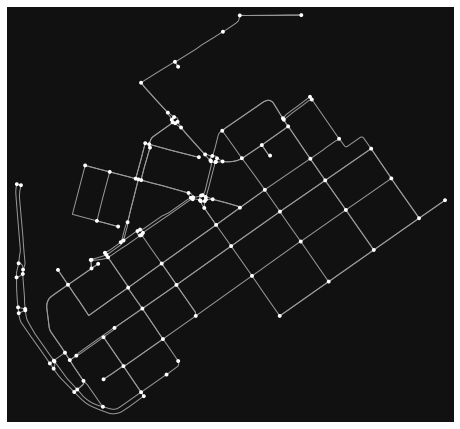

In [11]:
fig, ax = ox.plot_graph(graph)

In [22]:
place_polygon = ox.geocode_to_gdf(place_name)
place_polygon = place_polygon.to_crs(epsg=3067)
place_polygon['buffer'] = place_polygon['geometry'].buffer(200)
place_polygon = place_polygon.to_crs(epsg=4326)
place_polygon['buffer'] = place_polygon['buffer'].to_crs(epsg=4326)

In [23]:
graph = ox.graph_from_polygon(place_polygon['buffer'].values[0], network_type='bike')

/Users/cristian/opt/anaconda3/envs/geo/lib/python3.6/site-packages/osmnx/utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/cristian/opt/anaconda3/envs/geo/lib/python3.6/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/Users/cristian/opt/anaconda3/envs/geo/lib/python3.6/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


In [24]:
place_polygon.head()

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance,buffer
0,"POLYGON ((24.92064 60.16483, 24.92069 60.16447...",60.172075,60.160469,24.943453,24.920642,282313415,relation,184714,60.16628,24.932083,"Kamppi, Southern major district, Helsinki, Hel...",boundary,administrative,0.760313,"POLYGON ((24.91728 60.16547, 24.91730 60.16564..."


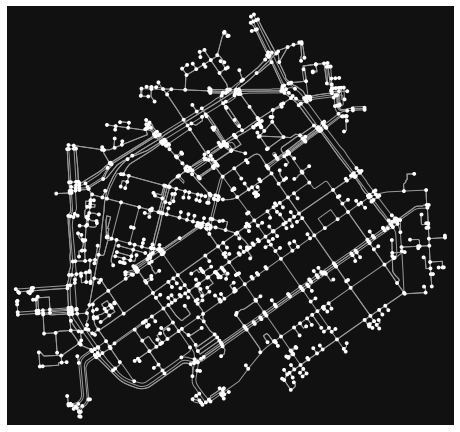

In [25]:
fig, ax = ox.plot_graph(graph)

In [90]:
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)
nodes = ox.graph_to_gdfs(graph, nodes=True, edges=False)

In [27]:
edges.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [28]:
edges.columns

Index(['osmid', 'oneway', 'lanes', 'name', 'highway', 'maxspeed', 'length',
       'geometry', 'access', 'bridge', 'junction', 'tunnel', 'service'],
      dtype='object')

In [91]:
edges.reset_index(inplace=True)
edges.head()

,u,v,key,osmid,oneway,lanes,name,highway,maxspeed,length,geometry,access,bridge,junction,tunnel,service
0,25216594,1372425721,0,23717777,True,2,Porkkalankatu,primary,40,10.404,"LINESTRING (24.92106 60.16479, 24.92087 60.16479)",NaN,NaN,NaN,NaN,NaN
1,25216594,1372425714,0,23856784,True,2,Mechelininkatu,primary,40,40.885,"LINESTRING (24.92106 60.16479, 24.92095 60.164...",NaN,NaN,NaN,NaN,NaN
2,25238865,146447626,0,"[59355210, 4229487]",False,2,Santakatu,residential,30,44.310,"LINESTRING (24.91994 60.16279, 24.91932 60.162...",NaN,NaN,NaN,NaN,NaN
3,25238865,57661989,0,7842621,False,NaN,Sinikaislankuja,residential,30,76.704,"LINESTRING (24.91994 60.16279, 24.91995 60.162...",NaN,NaN,NaN,NaN,NaN
4,25238865,314767800,0,231643806,False,NaN,NaN,cycleway,NaN,59.812,"LINESTRING (24.91994 60.16279, 24.92014 60.162...",NaN,NaN,NaN,NaN,NaN


In [31]:
edges['highway'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


service                      873
cycleway                     485
residential                  466
tertiary                     217
primary                      164
pedestrian                   158
secondary                    121
unclassified                  42
living_street                 16
[living_street, service]       6
[cycleway, residential]        6
[residential, pedestrian]      4
[cycleway, pedestrian]         4
[service, pedestrian]          2
tertiary_link                  2
[unclassified, service]        1
primary_link                   1
Name: highway, dtype: int64

In [92]:
graph_proj = ox.project_graph(graph)
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj)

In [93]:
print(edges_proj.crs)
print(nodes_proj.crs)

+proj=utm +zone=35 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
+proj=utm +zone=35 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


In [133]:
edges_proj.crs

<Projected CRS: +proj=utm +zone=35 +ellps=WGS84 +datum=WGS84 +unit ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 35N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [94]:
edges_proj.reset_index(inplace=True)
edges_proj.head()

,u,v,key,osmid,oneway,lanes,name,highway,maxspeed,length,geometry,bridge,tunnel,access,service,junction
0,25216594,1372425721,0,23717777,True,2,Porkkalankatu,primary,40,10.404,"LINESTRING (384631.322 6671580.071, 384620.884...",NaN,NaN,NaN,NaN,NaN
1,25216594,1372425714,0,23856784,True,2,Mechelininkatu,primary,40,40.885,"LINESTRING (384631.322 6671580.071, 384624.750...",NaN,NaN,NaN,NaN,NaN
2,1372425721,25290781,0,29191566,False,NaN,NaN,cycleway,NaN,228.587,"LINESTRING (384620.884 6671579.965, 384621.184...",NaN,NaN,NaN,NaN,NaN
3,1372425721,60070671,0,"[930820929, 930820930, 654270815]",False,NaN,NaN,cycleway,NaN,41.006,"LINESTRING (384620.884 6671579.965, 384620.720...",NaN,NaN,NaN,NaN,NaN
4,1372425714,25238874,0,"[78537378, 8169098, 29081876, 78537375]",True,"[3, 2]",Mechelininkatu,primary,40,85.540,"LINESTRING (384624.179 6671539.986, 384623.768...",NaN,NaN,NaN,NaN,NaN


### Print basic graph statistics

In [95]:
stats = ox.basic_stats(graph_proj, circuity_dist='euclidean')
stats

/Users/cristian/opt/anaconda3/envs/geo/lib/python3.6/site-packages/osmnx/stats.py:317: UserWarning: The `circuity_dist` argument has been deprecated and will be removed in a future release.
  warnings.warn(msg)


{'n': 1192,
 'm': 2568,
 'k_avg': 4.308724832214765,
 'edge_length_total': 91299.24099999992,
 'edge_length_avg': 35.552663940809936,
 'streets_per_node_avg': 2.700503355704698,
 'streets_per_node_counts': {0: 0, 1: 320, 2: 16, 3: 575, 4: 263, 5: 18},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.2684563758389262,
  2: 0.013422818791946308,
  3: 0.4823825503355705,
  4: 0.22063758389261745,
  5: 0.015100671140939598},
 'intersection_count': 872,
 'street_length_total': 57002.9489999999,
 'street_segment_count': 1569,
 'street_length_avg': 36.330751434034354,
 'circuity_avg': 1.0428448632566112,
 'self_loop_proportion': 0.0019120458891013384}

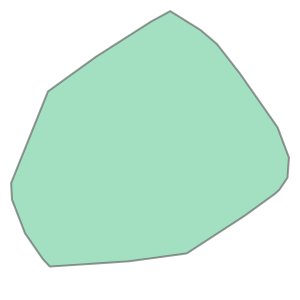

In [40]:
convex_hull = edges_proj.unary_union.convex_hull
convex_hull

In [96]:
area = convex_hull.area

stats = ox.basic_stats(graph_proj, area=area)
extended_stats = ox.extended_stats(graph_proj, ecc=True, cc=True)

for key, value in extended_stats.items():
    stats[key] = value

pd.Series(stats)

/Users/cristian/opt/anaconda3/envs/geo/lib/python3.6/site-packages/osmnx/stats.py:405: UserWarning: The extended_stats function has been deprecated and will be removed in a future release. Use NetworkX directly for extended topological measures.
  warnings.warn(msg)


n                                                                                   1192
m                                                                                   2568
k_avg                                                                            4.30872
edge_length_total                                                                91299.2
edge_length_avg                                                                  35.5527
streets_per_node_avg                                                              2.7005
streets_per_node_counts                     {0: 0, 1: 320, 2: 16, 3: 575, 4: 263, 5: 18}
streets_per_node_proportions           {0: 0.0, 1: 0.2684563758389262, 2: 0.013422818...
intersection_count                                                                   872
street_length_total                                                              57002.9
street_segment_count                                                                1569
street_length_avg    

#### Shortest path analysis

In [97]:
placename = 'Maria 01, Helsinki'
geocoded_place = ox.geocode_to_gdf(placename)
geocoded_place.head()

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((24.92122 60.16644, 24.92126 60.16625...",60.167525,60.16624,24.92317,24.921221,106651985,way,23856740,60.166884,24.921661,"Maria 01, Mechelininkatu, Hietalahti, Kamppi, ...",building,yes,0.58084


In [98]:
geocoded_place = geocoded_place.to_crs(crs=edges_proj.crs)
geocoded_place

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((384646.210 6671762.916, 384647.556 6...",60.167525,60.16624,24.92317,24.921221,106651985,way,23856740,60.166884,24.921661,"Maria 01, Mechelininkatu, Hietalahti, Kamppi, ...",building,yes,0.58084


In [44]:
geocoded_place.crs

<Projected CRS: +proj=utm +zone=35 +ellps=WGS84 +datum=WGS84 +unit ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 35N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [99]:
origin = geocoded_place['geometry'].centroid.values[0]
print(origin)

POINT (384692.1787195495 6671817.486579246)


In [100]:
dest_name = 'ruttopuisto'
geocoded_dest = ox.geocode_to_gdf(dest_name)
geocoded_dest = geocoded_dest.to_crs(edges_proj.crs)
destination = geocoded_dest['geometry'].centroid.values[0]
print(destination)

POINT (385673.4277923347 6671690.223032337)


In [101]:
orig_xy = (origin.y, origin.x)
target_xy = (destination.y, destination.x)

In [102]:
orig_node_id = ox.get_nearest_node(graph_proj, orig_xy, method='euclidean')
orig_node_id

/Users/cristian/opt/anaconda3/envs/geo/lib/python3.6/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


319719983

In [103]:
target_node_id = ox.get_nearest_node(graph_proj, target_xy, method='euclidean')
target_node_id

/Users/cristian/opt/anaconda3/envs/geo/lib/python3.6/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


1377208998

In [104]:
nodes_proj.head()

,y,x,street_count,lon,lat,highway,ref,geometry
osmid,,,,,,,,
25216594,6.671580e+06,384631.322372,5,24.921057,60.164794,NaN,NaN,POINT (384631.322 6671580.071)
1372425721,6.671580e+06,384620.883705,4,24.920869,60.164790,crossing,NaN,POINT (384620.884 6671579.965)
1372425714,6.671540e+06,384624.178763,4,24.920951,60.164432,NaN,NaN,POINT (384624.179 6671539.986)
25238865,6.671359e+06,384562.161669,3,24.919937,60.162791,NaN,NaN,POINT (384562.162 6671358.993)
146447626,6.671358e+06,384517.730720,3,24.919138,60.162766,NaN,NaN,POINT (384517.731 6671357.619)


In [106]:
nodes_proj.index.max()

9346709824

In [108]:
orig_node = nodes_proj.loc[orig_node_id]
target_node = nodes_proj.loc[target_node_id]

In [109]:
orig_node

y                                              6.67182e+06
x                                                   384706
street_count                                             3
lon                                                24.9223
lat                                                60.1669
highway                                                NaN
ref                                                    NaN
geometry        POINT (384706.2960887176 6671815.98858631)
Name: 319719983, dtype: object

In [110]:
target_node

y                                               6.67173e+06
x                                                    385613
street_count                                              3
lon                                                 24.9386
lat                                                 60.1664
highway                                                 NaN
ref                                                     NaN
geometry        POINT (385612.5328458318 6671729.630109307)
Name: 1377208998, dtype: object

In [111]:
od_nodes = gpd.GeoDataFrame([orig_node, target_node], geometry='geometry', crs=nodes_proj.crs)
od_nodes.head()

,y,x,street_count,lon,lat,highway,ref,geometry
319719983,6.671816e+06,384706.296089,3,24.922273,60.166932,NaN,NaN,POINT (384706.296 6671815.989)
1377208998,6.671730e+06,385612.532846,3,24.938641,60.166412,NaN,NaN,POINT (385612.533 6671729.630)


In [112]:
od_nodes.crs

<Projected CRS: +proj=utm +zone=35 +ellps=WGS84 +datum=WGS84 +unit ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 35N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [113]:
edges_proj.head()

,u,v,key,osmid,oneway,lanes,name,highway,maxspeed,length,geometry,bridge,tunnel,access,service,junction
0,25216594,1372425721,0,23717777,True,2,Porkkalankatu,primary,40,10.404,"LINESTRING (384631.322 6671580.071, 384620.884...",NaN,NaN,NaN,NaN,NaN
1,25216594,1372425714,0,23856784,True,2,Mechelininkatu,primary,40,40.885,"LINESTRING (384631.322 6671580.071, 384624.750...",NaN,NaN,NaN,NaN,NaN
2,1372425721,25290781,0,29191566,False,NaN,NaN,cycleway,NaN,228.587,"LINESTRING (384620.884 6671579.965, 384621.184...",NaN,NaN,NaN,NaN,NaN
3,1372425721,60070671,0,"[930820929, 930820930, 654270815]",False,NaN,NaN,cycleway,NaN,41.006,"LINESTRING (384620.884 6671579.965, 384620.720...",NaN,NaN,NaN,NaN,NaN
4,1372425714,25238874,0,"[78537378, 8169098, 29081876, 78537375]",True,"[3, 2]",Mechelininkatu,primary,40,85.540,"LINESTRING (384624.179 6671539.986, 384623.768...",NaN,NaN,NaN,NaN,NaN


#### Routing

In [114]:
# use the column 'length' of edges_proj as weight (length of the road segment)
route = nx.shortest_path(graph_proj, source=orig_node_id, target=target_node_id, weight='length')
print(route)

[319719983, 1382316822, 1382316829, 1382316852, 5464887863, 1382320461, 5154747161, 1378064352, 1372461709, 1372441203, 3205236795, 3205236793, 8244768393, 60278325, 56115897, 60072524, 7699019923, 7699019916, 7699019908, 7699019903, 267117319, 1897461604, 724233143, 724233128, 267117317, 846597945, 846597947, 2037356632, 1547012339, 569742461, 1372441189, 4524927399, 298372061, 7702074840, 7702074833, 60170471, 8856704555, 3227176325, 7676757030, 8856704573, 7676756995, 8856704588, 1377211668, 60170470, 8874925445, 3228706311, 1377211669, 1377209035, 1377208998]


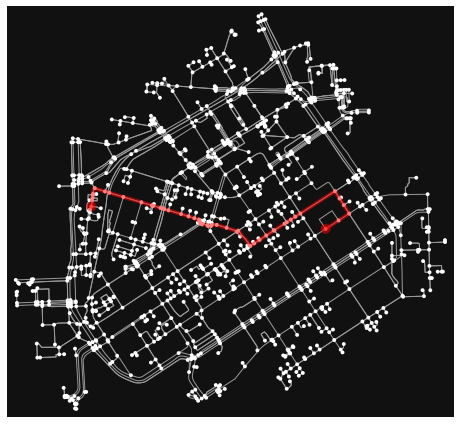

In [115]:
fig, ax = ox.plot_graph_route(graph_proj, route)

#### Route to LineString

In [116]:
route_nodes = nodes_proj.loc[route]
route_nodes

,y,x,street_count,lon,lat,highway,ref,geometry
osmid,,,,,,,,
319719983,6.671816e+06,384706.296089,3,24.922273,60.166932,NaN,NaN,POINT (384706.296 6671815.989)
1382316822,6.671839e+06,384709.579017,4,24.922319,60.167142,NaN,NaN,POINT (384709.579 6671839.311)
1382316829,6.671850e+06,384711.044607,3,24.922339,60.167236,NaN,NaN,POINT (384711.045 6671849.707)
1382316852,6.671861e+06,384712.504583,3,24.922359,60.167338,NaN,NaN,POINT (384712.505 6671860.984)
5464887863,6.671865e+06,384713.220293,3,24.922370,60.167377,NaN,NaN,POINT (384713.220 6671865.374)
1382320461,6.671887e+06,384719.671826,3,24.922473,60.167575,NaN,NaN,POINT (384719.672 6671887.215)
5154747161,6.671874e+06,384758.946564,3,24.923188,60.167471,NaN,NaN,POINT (384758.947 6671874.411)
1378064352,6.671869e+06,384776.322613,3,24.923504,60.167428,NaN,NaN,POINT (384776.323 6671869.117)
1372461709,6.671853e+06,384830.142058,3,24.924482,60.167300,NaN,NaN,POINT (384830.142 6671853.149)


In [118]:
route_nodes['geometry'].values

<GeometryArray>
Length: 49, dtype: geometry

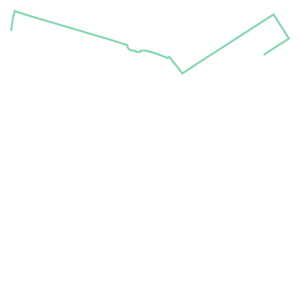

In [117]:
from shapely.geometry import LineString

route_line = LineString(list(route_nodes['geometry'].values))
route_line

In [119]:
print(route_line)

LINESTRING (384706.2960887176 6671815.98858631, 384709.579016634 6671839.310766771, 384711.0446067815 6671849.706932714, 384712.5045834767 6671860.983682171, 384713.2202930655 6671865.374335269, 384719.6718256475 6671887.214903845, 384758.9465637258 6671874.411331248, 384776.3226134898 6671869.117258262, 384830.1420579157 6671853.148941502, 384899.7816490309 6671832.538648066, 384940.404180437 6671820.708860516, 384945.2567720085 6671819.263710763, 384946.3350484787 6671818.94009317, 384973.2653280704 6671810.884028203, 384980.9519948182 6671808.6144153, 384989.0848975768 6671806.230510578, 385004.6191196858 6671801.508009416, 385053.4383533402 6671787.182207731, 385082.0099899894 6671778.150481744, 385104.8906960404 6671770.92453169, 385122.9978634067 6671765.364038102, 385124.3280759595 6671757.666171253, 385129.2421867896 6671751.271259707, 385134.4591417715 6671747.095726166, 385154.9584002629 6671743.611252417, 385157.5563355187 6671740.743731404, 385168.6664254228 6671740.6740847

In [120]:
route_geom = gpd.GeoDataFrame([[route_line]], geometry='geometry', crs=edges_proj.crs, columns=['geometry'])
route_geom

,geometry
0,"LINESTRING (384706.296 6671815.989, 384709.579..."


In [123]:
route_geom.loc[0, 'osmids'] = str(list(route_nodes.index.values))

In [124]:
route_geom

,geometry,osmids
0,"LINESTRING (384706.296 6671815.989, 384709.579...","[319719983, 1382316822, 1382316829, 1382316852..."


In [125]:
route_geom['length_m'] = route_geom.length

In [126]:
route_geom.head()

,geometry,osmids,length_m
0,"LINESTRING (384706.296 6671815.989, 384709.579...","[319719983, 1382316822, 1382316829, 1382316852...",1342.967643


In [127]:
tags = {'building': True}
buildings = ox.geometries_from_place(place_name, tags)

/Users/cristian/opt/anaconda3/envs/geo/lib/python3.6/site-packages/osmnx/utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/cristian/opt/anaconda3/envs/geo/lib/python3.6/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/Users/cristian/opt/anaconda3/envs/geo/lib/python3.6/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linest

In [128]:
buildings_proj = buildings.to_crs(CRS(edges_proj.crs))

In [134]:
buildings_proj.crs = edges_proj.crs
buildings_proj.crs

<Projected CRS: +proj=utm +zone=35 +ellps=WGS84 +datum=WGS84 +unit ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 35N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

CRSError: CRS is invalid: <Projected CRS: +proj=utm +zone=35 +ellps=WGS84 +datum=WGS84 +unit ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 35N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich


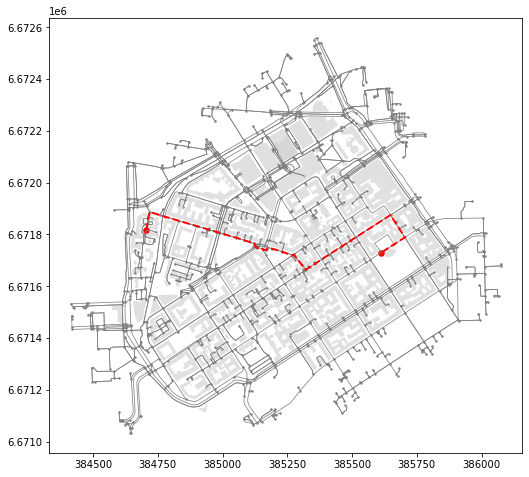

In [138]:
fig, ax = plt.subplots(figsize=(12, 8))

edges_proj.plot(ax=ax, lw=0.75, color='gray')
nodes_proj.plot(ax=ax, markersize=2, color='gray')

ax = buildings_proj.plot(ax=ax, facecolor='lightgray', alpha=0.7)
ax = route_geom.plot(ax=ax, lw=2, linestyle='--', color='red')
ax = od_nodes.plot(ax=ax, markersize=30, color='red')

ctx.add_basemap(ax, crs=edges_proj.crs, source=ctx.providers.CartoDB.Positron)

#### Save the data

In [141]:
place_name_out = place_name.replace(' ', '_').replace(',', '')
out_dir = 'L6_data'
# This file must exist
out_fp = os.path.join(out_dir, f'OSM_{place_name_out}.gpkg')

edges_proj.to_file(out_fp, layer='streets', driver='GPKG', mode='w')
route_geom.to_file(out_fp, layer='route', driver='GPKG', mode='w')
nodes_proj.to_file(out_fp, layer='nodes', driver='GPKG', mode='w')
od_nodes.to_file(out_fp, layer='route_OD', driver='GPKG', mode='w')
buildings[['geometry', 'name', 'addr:street']].to_file(out_fp, layer='buildings', dirver='GPKG', mode='w')

OSError: No such file or directory L6_data/OSM_Kamppi_Helsinki_Finland.gpkg